# Apriori Algorithm Example

In [3]:
dataset = [['Milk', 'Eggs', 'Bread'],
['Milk', 'Eggs'],
['Milk', 'Bread'],
['Eggs', 'Apple']]

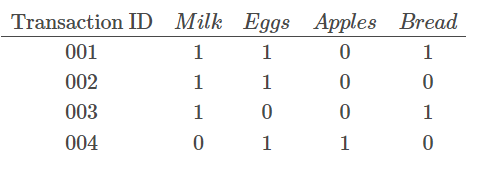

In [4]:
#Convert list to dataframe with boolean values
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder

te = TransactionEncoder()
te_array = te.fit(dataset).transform(dataset)
df = pd.DataFrame(te_array, columns=te.columns_)

In [5]:
print(df)

   Apple  Bread   Eggs   Milk
0  False   True   True   True
1  False  False   True   True
2  False   True  False   True
3   True  False   True  False


In [6]:
#Find frequently occurring itemsets using Apriori Algorithm
from mlxtend.frequent_patterns import apriori

frequent_itemsets_ap = apriori(df, min_support=0.01, use_colnames=True)

In [7]:
print(frequent_itemsets_ap)

   support             itemsets
0     0.25              (Apple)
1     0.50              (Bread)
2     0.75               (Eggs)
3     0.75               (Milk)
4     0.25        (Apple, Eggs)
5     0.25        (Bread, Eggs)
6     0.50        (Milk, Bread)
7     0.50         (Milk, Eggs)
8     0.25  (Milk, Bread, Eggs)


Note: “metric” and “min_threshold” parameters can be tuned on a case-by-case basis, depending on the business problem requirements.

In [8]:
#Find frequently occurring itemsets using F-P Growth
from mlxtend.frequent_patterns import fpgrowth

frequent_itemsets_fp=fpgrowth(df, min_support=0.01, use_colnames=True)
print(frequent_itemsets_fp)

   support             itemsets
0     0.75               (Milk)
1     0.75               (Eggs)
2     0.50              (Bread)
3     0.25              (Apple)
4     0.50         (Milk, Eggs)
5     0.50        (Milk, Bread)
6     0.25        (Bread, Eggs)
7     0.25  (Milk, Bread, Eggs)
8     0.25        (Apple, Eggs)


In [9]:
#Mine the Association Rules
from mlxtend.frequent_patterns import association_rules

rules_ap = association_rules(frequent_itemsets_ap, metric="confidence", min_threshold=0.8)
rules_fp = association_rules(frequent_itemsets_fp, metric="confidence", min_threshold=0.8)

In [10]:
print(rules_ap)

     antecedents consequents  antecedent support  consequent support  support  \
0        (Apple)      (Eggs)                0.25                0.75     0.25   
1        (Bread)      (Milk)                0.50                0.75     0.50   
2  (Bread, Eggs)      (Milk)                0.25                0.75     0.25   

   confidence      lift  leverage  conviction  
0         1.0  1.333333    0.0625         inf  
1         1.0  1.333333    0.1250         inf  
2         1.0  1.333333    0.0625         inf  


In [11]:
print(rules_fp)

     antecedents consequents  antecedent support  consequent support  support  \
0        (Bread)      (Milk)                0.50                0.75     0.50   
1  (Bread, Eggs)      (Milk)                0.25                0.75     0.25   
2        (Apple)      (Eggs)                0.25                0.75     0.25   

   confidence      lift  leverage  conviction  
0         1.0  1.333333    0.1250         inf  
1         1.0  1.333333    0.0625         inf  
2         1.0  1.333333    0.0625         inf  


From the two above we see that both algorithms found identical association rules with same coefficients, just presented in a different order.